Dans un marché ou la telecommunication est de plus en plus competetif,la fidelisation des clients est devenu un enjeu crucial.les entreprise cherchent non seulement a attirer des nouveaux cients et non seulement garder ses clients,c'est dans ce contexte que le churn devient tres important.
le churn designe le phenomene ou le client resilie son contrat ou change de fournisseur,cette decision est due principalement a un cout elevé des forfait,insatisfaction de service ou autres.


Collecte des donnes

In [2]:
import pandas as pd

data=pd.read_csv("telecom_churn.csv")
data

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


Data Prepocessing

In [3]:
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


Interprétation :

on vois les 5 premiers clients.
La colonne Churn est la variable cible : 0 signifie que le client n’a pas résilié, 1 signifie qu’il a résilié.
Les autres colonnes sont des caractéristiques du client :
AccountWeeks : ancienneté
ContractRenewal : renouvellement du contrat
DataPlan et DataUsage : forfait et usage internet
CustServCalls : nombre d’appels au service client
DayMins, DayCalls : usage téléphonique
MonthlyCharge, OverageFee, RoamMins : coûts

In [29]:
##les 5 dernieres lignes
data["DayMins"]

0       265.1
1       161.6
2       243.4
3       299.4
4       166.7
        ...  
3328    156.2
3329    231.1
3330    180.8
3331    213.8
3332    234.4
Name: DayMins, Length: 3333, dtype: float64

In [19]:
##Voir les noms des colonnes
data.columns

Index(['id', 'date', 'first_name', 'last_name', 'email', 'gender',
       'ip_address', 'country', 'price_paid', 'tax'],
      dtype='object')

In [24]:
##type de chaque columns
data.dtypes

Churn                int64
AccountWeeks         int64
ContractRenewal      int64
DataPlan             int64
DataUsage          float64
CustServCalls        int64
DayMins            float64
DayCalls             int64
MonthlyCharge      float64
OverageFee         float64
RoamMins           float64
dtype: object

In [25]:
###information sur le dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [4]:
data["Churn"]=data["Churn"].astype("category")
data["ContractRenewal"]=data["ContractRenewal"].astype("category")
data["DataPlan"]=data["DataPlan"].astype("category")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Churn            3333 non-null   category
 1   AccountWeeks     3333 non-null   int64   
 2   ContractRenewal  3333 non-null   category
 3   DataPlan         3333 non-null   category
 4   DataUsage        3333 non-null   float64 
 5   CustServCalls    3333 non-null   int64   
 6   DayMins          3333 non-null   float64 
 7   DayCalls         3333 non-null   int64   
 8   MonthlyCharge    3333 non-null   float64 
 9   OverageFee       3333 non-null   float64 
 10  RoamMins         3333 non-null   float64 
dtypes: category(3), float64(5), int64(3)
memory usage: 218.6 KB


In [6]:
data.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [7]:
##data.duplicated().sum()

data.nunique()

Churn                 2
AccountWeeks        212
ContractRenewal       2
DataPlan              2
DataUsage           174
CustServCalls        10
DayMins            1667
DayCalls            119
MonthlyCharge       627
OverageFee         1024
RoamMins            162
dtype: int64

In [46]:
##selection des colonnes data[["column1", "column2"]]
data["ContractRenewal"]

##data[["email","gender"]]

###data.iloc[0]  première ligne
##data.iloc[0,2]
##data.loc[0:5,'gender'] 



0       1
1       1
2       1
3       0
4       0
       ..
3328    1
3329    1
3330    1
3331    0
3332    1
Name: ContractRenewal, Length: 3333, dtype: int64

In [37]:
data.isnull().sum()

id              0
date            0
first_name      0
last_name       0
email           0
gender         69
ip_address      0
country        44
price_paid      0
tax           346
dtype: int64

In [38]:
data.duplicated().sum()

np.int64(0)

In [3]:
data.describe() 

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [4]:
data['Churn'].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

In [48]:
data.sample(10)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
3032,0,173,1,0,0.00,1,109.4,103,28.0,5.07,7.8
732,0,48,1,0,0.00,2,300.4,94,63.0,6.66,7.2
1903,1,93,0,1,3.78,1,225.7,117,86.8,5.98,14.0
1818,0,78,1,0,0.00,3,139.2,140,40.0,9.57,11.8
1643,0,107,1,0,0.00,3,134.0,104,38.0,8.73,7.3
2248,0,152,1,1,3.59,5,239.1,105,94.9,10.46,13.3
464,0,105,1,1,2.30,0,193.5,85,75.0,11.01,8.5
1262,0,157,1,0,0.00,4,220.7,105,48.0,5.97,11.5
1503,0,57,0,1,3.29,2,236.5,94,87.9,8.16,12.2
786,0,85,1,0,0.00,0,209.8,82,53.0,9.73,11.3


In [53]:
data["Churn"]=data["Churn"].astype("category")

In [54]:
data["Churn"].dtype

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

In [55]:
data["Churn"].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Churn            3333 non-null   category
 1   AccountWeeks     3333 non-null   int64   
 2   ContractRenewal  3333 non-null   int64   
 3   DataPlan         3333 non-null   int64   
 4   DataUsage        3333 non-null   float64 
 5   CustServCalls    3333 non-null   int64   
 6   DayMins          3333 non-null   float64 
 7   DayCalls         3333 non-null   int64   
 8   MonthlyCharge    3333 non-null   float64 
 9   OverageFee       3333 non-null   float64 
 10  RoamMins         3333 non-null   float64 
dtypes: category(1), float64(5), int64(5)
memory usage: 263.9 KB


In [ ]:
##data["Churn"].value_counts()
data["Churn"].value_counts(normalize=True, dropna=False)

Churn
0    0.855086
1    0.144914
Name: proportion, dtype: float64

On voit ici que 85% des client n'ont pas resilié et tandis que 14% quitte,la 

In [8]:
import matplotlib.pyplot as plt

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountWeeks,3333.0,101.064806,39.822106,1.0,74.00,101.00,127.00,243.00
DataUsage,3333.0,0.816475,1.272668,0.0,0.00,0.00,1.78,5.40
CustServCalls,3333.0,1.562856,1.315491,0.0,1.00,1.00,2.00,9.00
DayMins,3333.0,179.775098,54.467389,0.0,143.70,179.40,216.40,350.80
DayCalls,3333.0,100.435644,20.069084,0.0,87.00,101.00,114.00,165.00
MonthlyCharge,3333.0,56.305161,16.426032,14.0,45.00,53.50,66.20,111.30
OverageFee,3333.0,10.051488,2.535712,0.0,8.33,10.07,11.77,18.19
RoamMins,3333.0,10.237294,2.791840,0.0,8.50,10.30,12.10,20.00


In [10]:
numericals_columns=data.select_dtypes(include=["int64","float64"]).columns

In [ ]:
for col in numericals_columns:
    

<Axes: xlabel='Churn'>

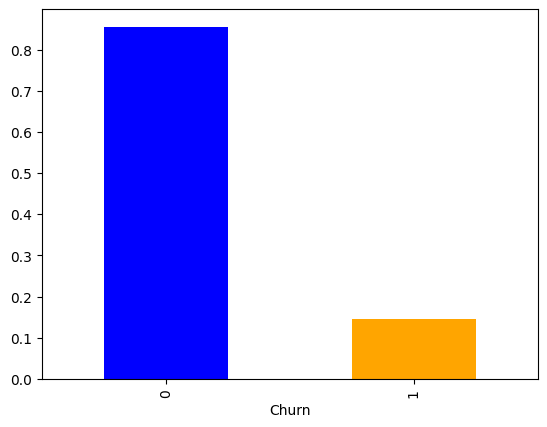

In [ ]:
data['Churn'].value_counts(normalize=True).plot(kind='bar', color=['blue', 'orange'])

In [ ]:
def plot_all_categoricals(data, max_unique=15):
    for col in data.columns:
        if data[col].nunique() <= max_unique:   # critère pour garder les variables catégorielles
            print("\n", "="*20, col, "="*20)
            plot_categorical(data, col)


In [54]:
def plot_categorical(data, col):
    counts = data[col].value_counts(dropna=False)   # 1. on compte les valeurs

    plt.figure(figsize=(6,4))                     # 2. taille du graphe
    counts.plot(kind="bar",                       # 3. graphique en barres
                color="skyblue",                  # couleur
                edgecolor="black")                # contour noir
    
    plt.title(f"Distribution de {col}")           # 4. titre du graphe
    plt.xlabel(col)                               # 5. nom de l’axe X
    plt.ylabel("Effectif")                        # 6. nom de l’axe Y
    plt.xticks(rotation=0)                        # 7. labels horizontaux
    plt.show()                                    # 8. afficher le graphe
    
    # Tableau récapitulatif
    perc = counts / counts.sum() * 100
    summary = pd.DataFrame({"count": counts, "percent": perc.round(2)})
    print(summary)


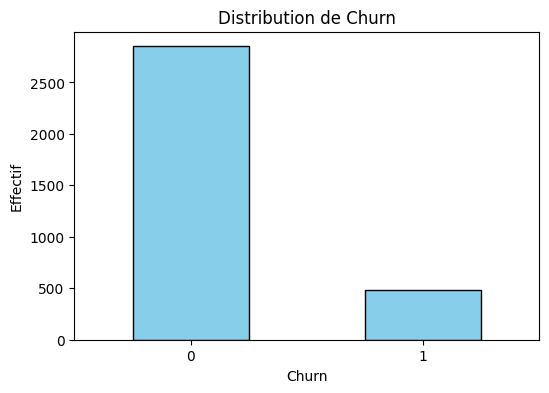

       count  percent
Churn                
0       2850    85.51
1        483    14.49


In [59]:
plot_categorical(data, "Churn")


In [61]:
data['Churn'].describe()

count     3333
unique       2
top          0
freq      2850
Name: Churn, dtype: int64

In [13]:
cat=data.select_dtypes(include=['category']).columns
cat

Index(['Churn', 'ContractRenewal', 'DataPlan'], dtype='object')

In [18]:
cat.value_counts()

Churn              1
ContractRenewal    1
DataPlan           1
Name: count, dtype: int64

In [15]:
for col in cat:
   print(f"\n{col} value counts:\n", data[col].value_counts())



Churn value counts:
 Churn
0    2850
1     483
Name: count, dtype: int64

ContractRenewal value counts:
 ContractRenewal
1    3010
0     323
Name: count, dtype: int64

DataPlan value counts:
 DataPlan
0    2411
1     922
Name: count, dtype: int64


C:\Users\ABDILLAHIOMARDJAMA\AppData\Local\Temp\ipykernel_27480\2939210256.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="viridis")


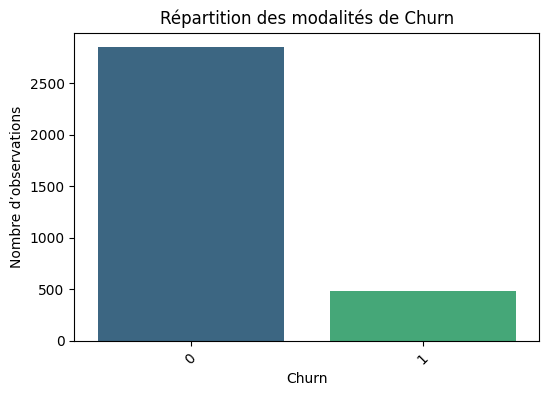

C:\Users\ABDILLAHIOMARDJAMA\AppData\Local\Temp\ipykernel_27480\2939210256.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="viridis")


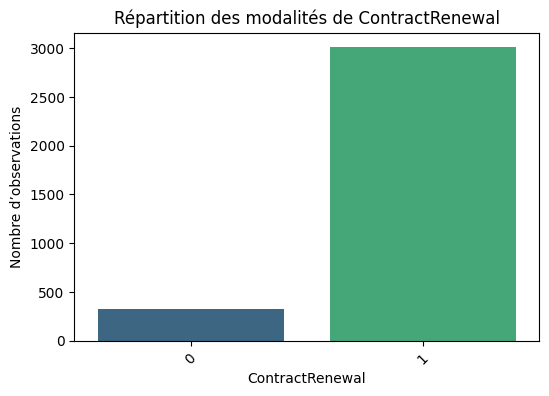

C:\Users\ABDILLAHIOMARDJAMA\AppData\Local\Temp\ipykernel_27480\2939210256.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="viridis")


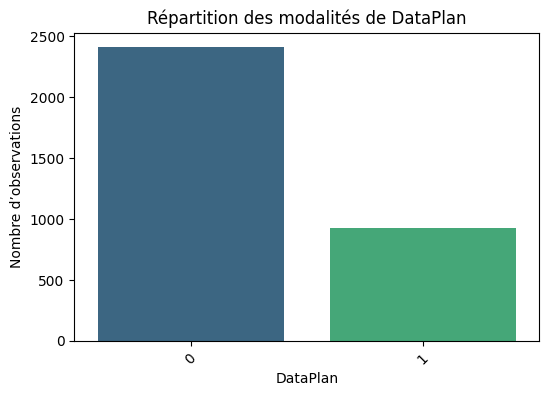

In [19]:
import seaborn as sns
for col in cat:
    plt.figure(figsize=(6,4))
    sns.countplot(data=data, x=col, palette="viridis")
    plt.title(f"Répartition des modalités de {col}")
    plt.xlabel(col)
    plt.ylabel("Nombre d’observations")
    plt.xticks(rotation=45)
    plt.show()